'HelloFresh' one of USA's biggest meal-prep service companies has unveiled a new  ‘Keto Meal Plan’ that helps reduce the risk of diabetes. The marketing department would like to run a campaign via (Facebook Ads) that targets specific groups in order to maximize audience response and remain within budget. They’ve provided a dataset with the Hospital stay of patients by (race, gender) that have diabetic medication vs those that have not been prescribed a diabetic medication.

'HelloFresh' requested three different analysis and group recommendation from the analyst:

    1. table analyzing the hospital stay by the Gender.
    2. table analyzing the hospital stay by the Race.
    3. table analyzing the hospital stay by both categories with a budget breakdown



 

In [1]:
#code used to expand the width of the screen *Thank you Stevie*
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Imports needed to perform the analysis
import pandas as pd
import sidetable
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
from IPython.display import display_html 


In [3]:
# Import of the data that needs to be analyzed
dataset= pd.read_csv ('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [4]:
# Frame of provided Data to understand the name of the columns and data
dataset.tail(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [5]:
#  Code to understand the data type of each column to perform proper aggregations. 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
#Data cleaning and Filtering functions to better categorize the data grouping.
# Replace the '?' with unknown
dataset1 = dataset.replace(['?'],'Unknown')
# Replace the 'Unknown/Invalid' with Other
dataset2 = dataset1.replace(['Unknown/Invalid'],'Other')
#Replace the 'other' on Gender with 'Non-Binary'
dataset2['gender'].replace({'Other':'Non-Binary'}, inplace = True)
#dataframe that filters down to were medication was not prescribed
datasetmedno= dataset2[dataset2['diabetesMed']=='No']
#dataframe that filters down to were medication was prescribed
datasetmedyes= dataset2[dataset2['diabetesMed']=='Yes']


# 1. Group (Gender)

With Medication time_in_hospital mean sum amin amax gender 
 
 Female 
 4.575394 
 191192 
 1 
 14 
 
 
 Male 
 4.409526 
 161274 
 1 
 14 
 
 
 Non-Binary 
 4.500000 
 9 
 1 
 8 
 
 -----VS----- With No Medication time_in_hospital mean sum amin amax gender 
 
 Female 
 4.166396 
 53834 
 1 
 14 
 
 
 Male 
 3.916802 
 41052 
 1 
 14 
 
 
 Non-Binary 
 1.000000 
 1 
 1 
 1

Patients with Diabetic Prescription spent more time in the Hospital than those with no medication
*Analyst recommends for Facebook campaigns to prioritize on the Female audience*


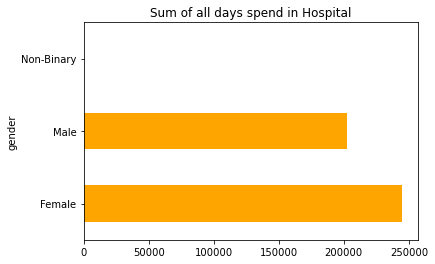

In [16]:
            # The below Code creates a comparison of the Gender by Medication (Yes/No)
#dataFrame Created for each Gender Group (Medication Yes/No)
gender_yes = datasetmedyes.groupby(['gender']).agg({'time_in_hospital':[np.mean, np.sum, np.min, np.max]})
gender_no = datasetmedno.groupby(['gender']).agg({'time_in_hospital':[np.mean, np.sum, np.min, np.max]})
#Bar chart created that outlines the total of combined groups
dataset2.groupby(['gender'])['time_in_hospital'].sum().plot.barh(width=0.5,color=['orange'],title='Sum of all days spent in Hospital')
#HTML import code to place the tables side by side for a better linear comparison
df5_styler = gender_yes.style.set_table_attributes("style='display:inline'").set_caption('With Medication')
df6_styler = gender_no.style.set_table_attributes("style='display:inline'").set_caption('With No Medication')
display_html(df5_styler._repr_html_()  +' -----VS----- '+  df6_styler._repr_html_(), raw=True)
#Print of the which group to select base on the data
print('Patients with diabetic prescription spent more time in the hospital than those with no medication\n'
'*Analyst recommends for Facebook campaigns to prioritize on the Female audience*')

# 2. Group (Race)

With Medication time_in_hospital mean sum amin amax race 
 
 AfricanAmerican 
 4.546560 
 67280 
 1 
 14 
 
 
 Asian 
 4.147368 
 1970 
 1 
 14 
 
 
 Caucasian 
 4.502412 
 263166 
 1 
 14 
 
 
 Hispanic 
 4.124436 
 6397 
 1 
 14 
 
 
 Other 
 4.412972 
 5375 
 1 
 14 
 
 
 Unknown 
 4.429182 
 8287 
 1 
 14 
 
 -----VS----- With No Medication time_in_hospital mean sum amin amax race 
 
 AfricanAmerican 
 4.378060 
 19316 
 1 
 14 
 
 
 Asian 
 3.560241 
 591 
 1 
 14 
 
 
 Caucasian 
 3.999263 
 70583 
 1 
 14 
 
 
 Hispanic 
 3.853909 
 1873 
 1 
 14 
 
 
 Other 
 3.684028 
 1061 
 1 
 14 
 
 
 Unknown 
 3.639303 
 1463 
 1 
 14

Race groups with diabetic prescription spent more time in the hospital than those with no medication
*Analyst recommends for facebook campaigns to prioritize on (Female > Caucasian) audience*


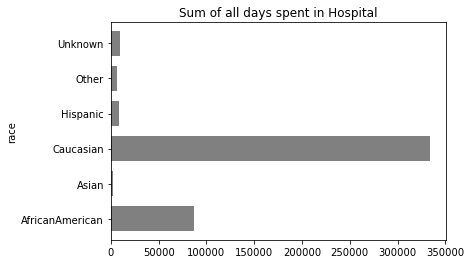

In [18]:
            # The below Code creates a comparison of the Race by Medication (Yes/No)
#dataFrame Created for each Race Group (Medication Yes/No)
race_yes = datasetmedyes.groupby(['race']).agg({'time_in_hospital':[np.mean, np.sum, np.min, np.max]})
race_no = datasetmedno.groupby(['race']).agg({'time_in_hospital':[np.mean, np.sum, np.min, np.max]})
#Bar chart created that outlines the total of combined groups
dataset2.groupby(['race'])['time_in_hospital'].sum().plot.barh(width=0.7,color=['grey'],title='Sum of all days spent in Hospital')
#HTML import code to place the tables side by side for a better linear comparison
df5_styler = race_yes.style.set_table_attributes("style='display:inline'").set_caption('With Medication')
df6_styler = race_no.style.set_table_attributes("style='display:inline'").set_caption('With No Medication')
display_html(df5_styler._repr_html_()  +' -----VS----- '+  df6_styler._repr_html_(), raw=True)
#Print of the which group to select base on the data
print('Race groups with diabetic prescription spent more time in the hospital than those with no medication\n'
'*Analyst recommends for facebook campaigns to prioritize on (Female > Caucasian) audience*')

# 3. Combined Group (Gender & Race) with Campaign Budget Breakdown 

With Medication time_in_hospital mean sum amin amax race gender 
 
 AfricanAmerican 
 Female 
 4.586302 
 41451 
 1 
 14 
 
 
 Male 
 4.484201 
 25829 
 1 
 14 
 
 
 Asian 
 Female 
 4.087500 
 981 
 1 
 14 
 
 
 Male 
 4.208511 
 989 
 1 
 14 
 
 
 Caucasian 
 Female 
 4.593073 
 138573 
 1 
 14 
 
 
 Male 
 4.405693 
 124593 
 1 
 14 
 
 
 Hispanic 
 Female 
 4.157385 
 3434 
 1 
 14 
 
 
 Male 
 4.086897 
 2963 
 1 
 14 
 
 
 Other 
 Female 
 4.335582 
 2571 
 1 
 14 
 
 
 Male 
 4.491987 
 2803 
 1 
 14 
 
 
 Non-Binary 
 1.000000 
 1 
 1 
 1 
 
 
 Unknown 
 Female 
 4.545652 
 4182 
 1 
 14 
 
 
 Male 
 4.312632 
 4097 
 1 
 14 
 
 
 Non-Binary 
 8.000000 
 8 
 8 
 8 
 
 VS With No Medication time_in_hospital mean sum amin amax race gender 
 
 AfricanAmerican 
 Female 
 4.389963 
 11809 
 1 
 14 
 
 
 Male 
 4.359466 
 7507 
 1 
 14 
 
 
 Asian 
 Female 
 3.320513 
 259 
 1 
 13 
 
 
 Male 
 3.772727 
 332 
 1 
 14 
 
 
 Caucasian 
 Female 
 4.127639 
 39291 
 1 
 14 
 
 
 Male 
 3.848954 
 31292 
 1 
 14 
 
 
 Hispanic 
 Female 
 3.864662 
 1028 
 1 
 14 
 
 
 Male 
 3.840909 
 845 
 1 
 14 
 
 
 Other 
 Female 
 3.935484 
 610 
 1 
 14 
 
 
 Male 
 3.390977 
 451 
 1 
 12 
 
 
 Unknown 
 Female 
 3.929577 
 837 
 1 
 13 
 
 
 Male 
 3.324468 
 625 
 1 
 14 
 
 
 Non-Binary 
 1.000000 
 1 
 1 
 1

Analyst recommends for the campaign budget to be split in the following way
-Female Caucasian = 39.31% (138,573 / 352,475)
-Other 13 Groups each = 4.7% (4.7% * 13 = 60.69%)
-Budget 100% ( 39.31% + 60.69% = 100%)


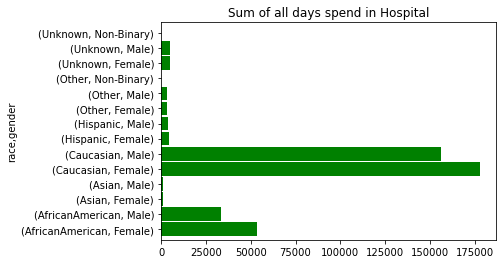

In [26]:
            # The below Code creates a comparison of the Gender/Race by Medication (Yes/No)
#dataFrame Created for each Race Group (Medication Yes/No)
race_gender_yes = datasetmedyes.groupby(['race','gender']).agg({'time_in_hospital':[np.mean, np.sum, np.min, np.max]})
race_gender_no = datasetmedno.groupby(['race','gender']).agg({'time_in_hospital':[np.mean, np.sum, np.min, np.max]})
#Bar chart created that outlines the total of combined groups
dataset2.groupby(['race','gender'])['time_in_hospital'].sum().plot.barh(width=0.9,color=['green'],title='Sum of all days spend in Hospital')
#HTML import code to place the tables side by side for a better linear comparison
df7_styler = race_gender_yes.style.set_table_attributes("style='display:inline'").set_caption('With Medication')
df8_styler = race_gender_no.style.set_table_attributes("style='display:inline'").set_caption('With No Medication')
display_html(df7_styler._repr_html_()  +'VS'+  df8_styler._repr_html_(), raw=True)
#Print of the which group to select base on the data
print('Analyst recommends for the campaign budget to be split in the following way\n'
'-Female Caucasian = 39.31% (138,573 / 352,475)\n'
'-Other 13 Groups each = 4.7% (4.7% * 13 = 60.69%)\n'
'-Budget 100% ( 39.31% + 60.69% = 100%)')